# Project Description

Create a machine learning model prototype for Zyfra. The firm creates efficiency solutions for heavy industry. The model should be able to predict how much gold can be recovered from gold ore.  The model will aid in the optimization of production and the elimination of unprofitable parameters.

## Load libraries

In [1]:
#import of libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")

## Prepare the data.

### Open the files and look into the data.

In [2]:
# Load the data
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
#creating a function for displaying the main information about datasets:
def df_info(df):
    print('DataFrame:')
    display(df.head())
    print('------------------------------------------------------------------------------------------')
    print('Info:')
    print('')
    print(df.info())
    print('------------------------------------------------------------------------------------------')
    print('Shape')
    print('')
    display(df.shape)

Let's check what we have in our datasets.

In [4]:
df_info(df_train)

DataFrame:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 n

(16860, 87)

In [5]:
df_info(df_test)

DataFrame:


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   

(5856, 53)

In [6]:
df_info(df_full)

DataFrame:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 n

(22716, 87)

### Check that recovery is calculated correctly.

In [7]:
#creating a function for calculating recovery:
def calc_recovery(c, f, t):
    recovery = ((c * (f - t)) / (f * (c - t))) * 100
    recovery[recovery < 0] = np.nan
    recovery[recovery > 100] = np.nan
    return recovery

In [8]:
#creating the column with calculations:
df_train['rougher.output.calc'] = calc_recovery(df_train['rougher.output.concentrate_au'],
           df_train['rougher.input.feed_au'], df_train['rougher.output.tail_au'])

In [9]:
#comparing results:
df_train[['rougher.output.recovery', 'rougher.output.calc']].head()

,rougher.output.recovery,rougher.output.calc
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794


In [10]:
#filling NA with 0 for MAE calculations:
df_train['rougher.output.recovery'].fillna(0, inplace=True)
df_train['rougher.output.calc'].fillna(0, inplace=True)

In [11]:
mean_absolute_error(df_train['rougher.output.recovery'], df_train['rougher.output.calc'])

7.883623897364653e-15

The MAE value is low which means that means that recovery calculations is corect

### Analyze the features not available in the test set.

In [12]:
test_columns = df_test.columns
df_non_test_columns = df_full.drop(test_columns, axis=1)

In [13]:
df_test = df_test.merge(df_full[['date', 'rougher.output.recovery', 'final.output.recovery']], 
                           how = 'left', on = 'date')

In [14]:
df_info(df_non_test_columns)

DataFrame:


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.output.concentrate_ag,...,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au
0,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,8.547551,...,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,14.500184,4.694824,8.764648,2.606185
1,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,8.558743,...,20.050975,86.843261,4.955378,0.536689,18.965234,1.184827,14.265474,4.592547,9.001494,2.488248
2,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,8.603505,...,19.737170,86.842308,4.843460,0.546416,18.808533,1.162562,14.115662,4.624775,8.842896,2.458187
3,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,7.221879,...,19.320810,87.226430,4.655288,0.542525,19.330200,1.079755,13.732071,4.482453,9.122857,2.322062
4,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,9.089428,...,19.216101,86.688794,4.552800,0.515438,19.267422,1.012642,14.079996,4.470737,8.871028,2.330448


------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 n

(22716, 34)

Apparently, we are dealing with the output values of raw materials and other chemicals obtained at various stages of raw material enrichment.

###  Perform data preprocessing.

In [15]:
df_full['date'] = pd.to_datetime(df_full['date'])
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])

In [16]:
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [17]:
df_full.isna().sum()

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

As can be seen, all columns have missing values. The omissions are most likely due to different stages of enrichment.

First, take the training sample and remove all columns that do not appear in the test sample:

In [18]:
df_train = df_train[df_test.columns]
df_train.shape

(16860, 55)

In [19]:
#checking missing values in test and train sets:
df_train.isna().sum()

date                                             0
primary_cleaner.input.sulfate                 1307
primary_cleaner.input.depressant              1262
primary_cleaner.input.feed_size                  0
primary_cleaner.input.xanthate                 985
primary_cleaner.state.floatbank8_a_air          40
primary_cleaner.state.floatbank8_a_level        33
primary_cleaner.state.floatbank8_b_air          40
primary_cleaner.state.floatbank8_b_level        27
primary_cleaner.state.floatbank8_c_air          38
primary_cleaner.state.floatbank8_c_level        27
primary_cleaner.state.floatbank8_d_air          39
primary_cleaner.state.floatbank8_d_level        27
rougher.input.feed_ag                           82
rougher.input.feed_pb                          228
rougher.input.feed_rate                        513
rougher.input.feed_size                        417
rougher.input.feed_sol                         292
rougher.input.feed_au                           83
rougher.input.floatbank10_sulfa

In [20]:
df_test.isna().sum()

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


Both samples have missing values. Let's use mean values to replace all of the missing values. In the future, I will try methods to remove them and replace them with zero values. The option with the mean replacement produced the best results.

In [21]:
df_train.fillna(df_train.mean(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)

In [22]:
df_train.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [23]:
df_test.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [24]:
print(df_train.shape, df_test.shape, sep=' | ')

(16860, 55) | (5856, 55)


No we have sets without missing values and we can continue to work with it.

## Analyze the data

### Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

In [25]:
elements = {'gold': 'au', 'silver': 'ag', 'lead': 'pb'}
elements

{'gold': 'au', 'silver': 'ag', 'lead': 'pb'}

In [26]:
#creating function for visualizaition with values > 0 in order to see the picture wothout outliers: 
def concentrate_viz(e):
    cols = ['rougher.input.feed_'+e, 'rougher.output.concentrate_'+e, 
            'primary_cleaner.output.concentrate_'+e, 'final.output.concentrate_'+e]
    concentrate = df_full[cols]  
    sns.displot(df_full[cols], 
            legend=True, 
            kde=True, 
            height=7.7, 
            aspect=1.5)
    plt.title('Concentration of ' + str(e).title() + ' on the different stages', fontsize=16)
    plt.figure(figsize=(12.8,8))
    plt.xticks(rotation=0)
    sns.boxplot(data=df_full[cols])

**Gold concentration:**

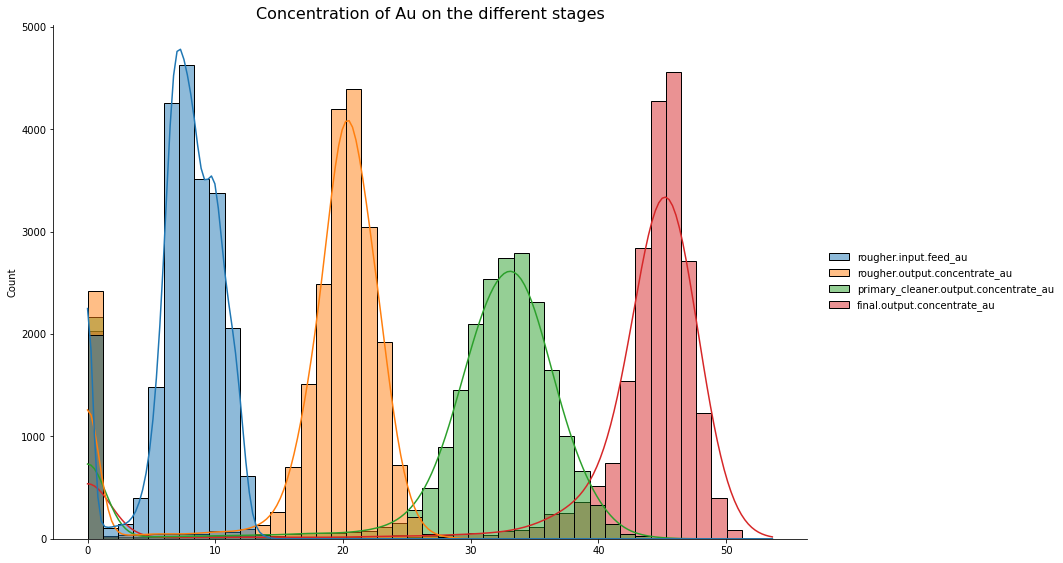

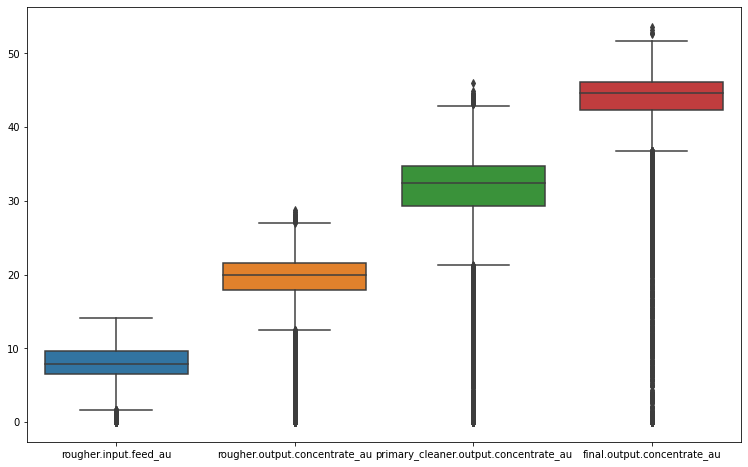

In [27]:
concentrate_viz(elements['gold'])

It can be seen that the concentration of gold increases with each subsequent step. The boxplots also show that there are outliers at each stage.

**Silver concentration:**

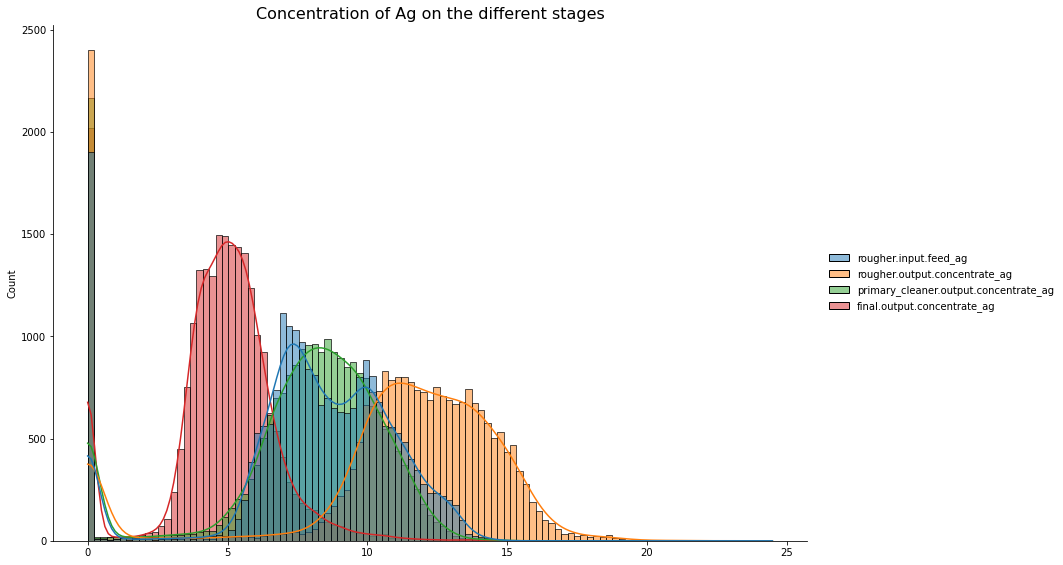

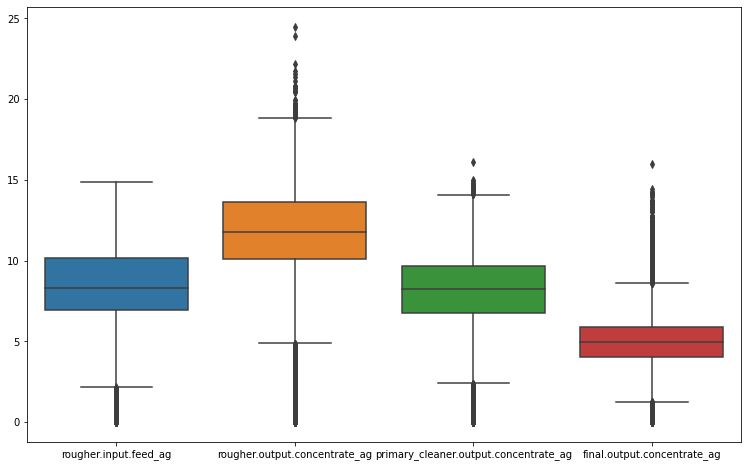

In [28]:
concentrate_viz(elements['silver'])

We can see that the distribution shrinks and the concentration decreases with each stage.
There are also outliers here.

**Concentration of Lead:**

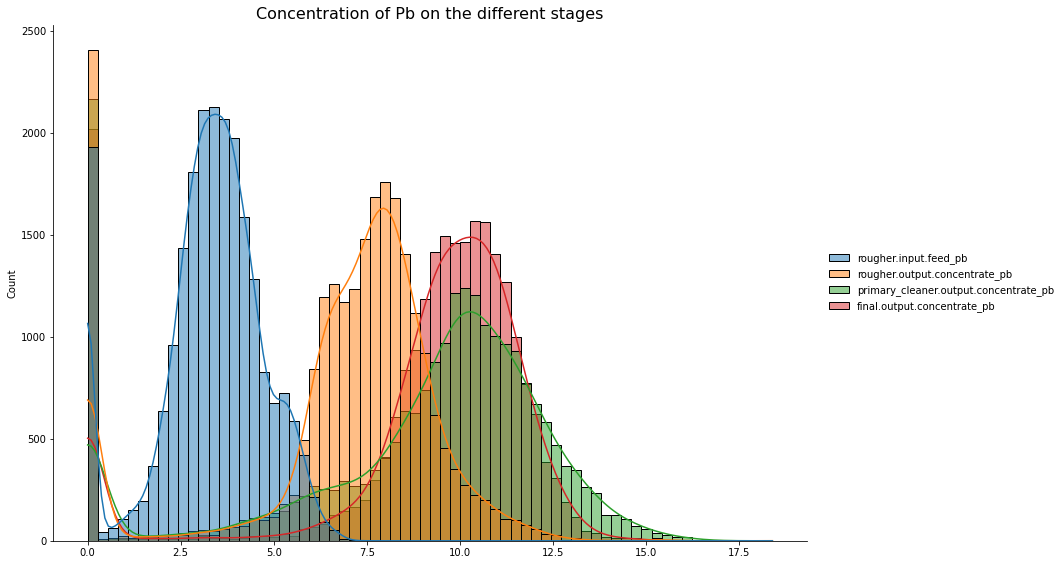

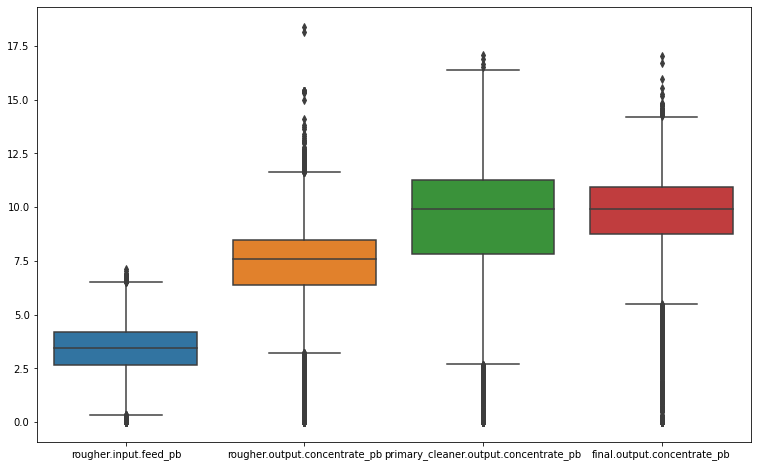

In [29]:
concentrate_viz(elements['lead'])

According to the graphs above, the concentration of lead gradually increases during the first three stages of purification. Least of all lead at the start of the process, when it is mixed with gold-bearing ore. Surprisingly, the median indicator almost coincides at the last two stages, but the spread of values decreases at the final stage.

There are also outliers.

### Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.

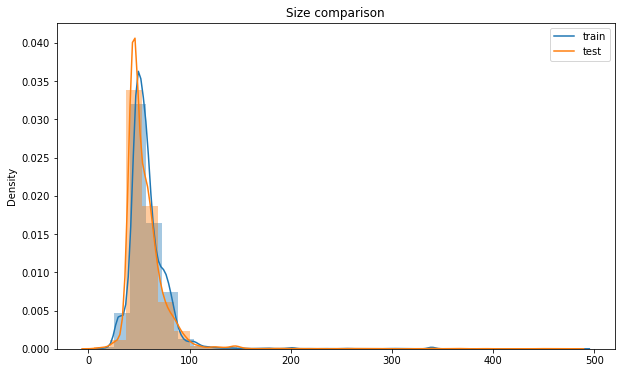

In [30]:
rougher_train_concentration = df_train[df_train['rougher.input.feed_size'] > 1]
rougher_test_concentration = df_test[df_test['rougher.input.feed_size'] > 1]
    
plt.figure(figsize=(10, 6))
sns.distplot(rougher_train_concentration[['rougher.input.feed_size']], bins=30)
sns.distplot(rougher_test_concentration[['rougher.input.feed_size']], bins=30)
plt.legend(['train', 'test'])
plt.title('Size comparison')
plt.show()

In general, the distributions are slightly different, but not critical. It can be seen that the test sample is dominated by larger granules.


### Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies.

In [31]:
first = 'rougher.input.feed_'
second = 'rougher.output.concentrate_'
third = 'primary_cleaner.output.concentrate_'
fourth = 'final.output.concentrate_'

In [32]:
df_full['raw_material'] = df_full[[first+'au', first+'ag', first+'pb']].sum(axis=1)
df_full['draft_concentrate'] = df_full[[second+'au', second+'ag', second+'pb']].sum(axis=1)
df_full['concentrate_after_filtering'] = df_full[[third+'au', third+'ag', third+'pb']].sum(axis=1)
df_full['final_concentrate'] = df_full[[fourth+'au', fourth+'ag', fourth+'pb']].sum(axis=1)

In [33]:
df_full[['raw_material', 'draft_concentrate', 'concentrate_after_filtering', 'final_concentrate']].describe()

,raw_material,draft_concentrate,concentrate_after_filtering,final_concentrate
count,22716.000000,22716.000000,22716.000000,22716.000000
mean,18.833952,35.500849,45.489901,53.673032
std,7.418530,13.401008,16.248774,17.975586
min,0.000000,0.000000,0.000000,0.000000
25%,16.447446,37.326591,48.745632,58.684224
50%,19.560398,39.961497,51.517962,60.073814
75%,23.572584,42.181417,53.156499,60.990543
max,35.071987,55.568687,60.269003,65.575259


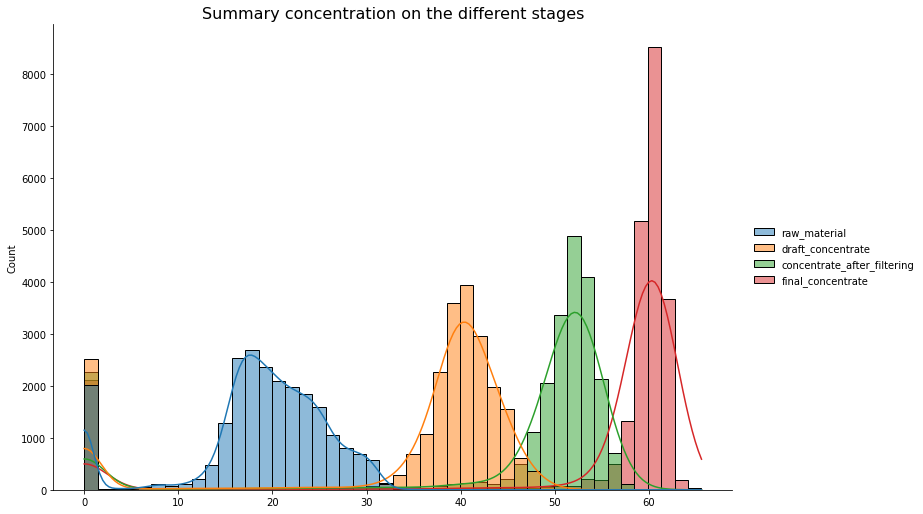

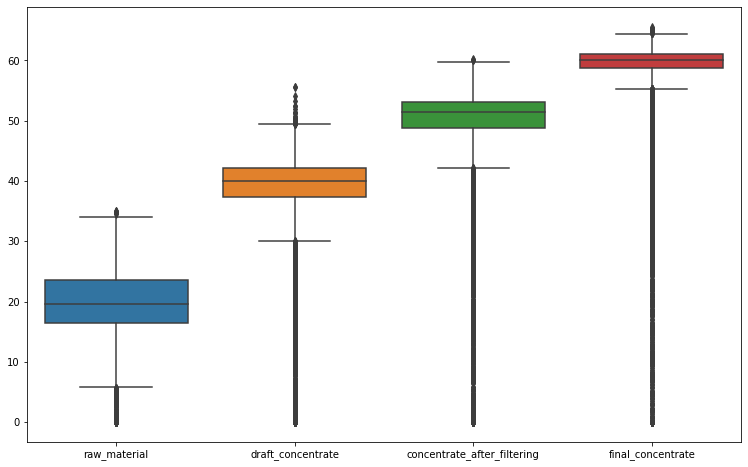

In [34]:
cols_all = ['raw_material', 'draft_concentrate', 'concentrate_after_filtering', 'final_concentrate']
    
concentrate = df_full[cols_all]    
    
sns.displot(df_full[cols_all], 
            legend=True, 
            kde=True, 
            height=7, 
            aspect=1.5)
    
plt.title('Summary concentration on the different stages', fontsize=16)
    
plt.figure(figsize=(12.8,8))
plt.xticks(rotation=0)
sns.boxplot(data=df_full[cols_all])
plt.show()

There are a few 0 value outliers. In the raw, it can be connected with nonmetal materials. They may, however, have an impact on the performance of our models, so it is best to remove them.

In [35]:
for col in cols_all:
    print(col, 'zeros:', len(df_full[df_full[col] == 0]))
    print(col, 'under 1:', len(df_full[df_full[col] < 1]))
    print('\n')

raw_material zeros: 1626
raw_material under 1: 2007


draft_concentrate zeros: 2051
draft_concentrate under 1: 2504


concentrate_after_filtering zeros: 1724
concentrate_after_filtering under 1: 2260


final_concentrate zeros: 1699
final_concentrate under 1: 2105




In [36]:
full_clean = df_full[
    (df_full['raw_material'] >  1) & 
    (df_full['draft_concentrate'] > 1) & 
    (df_full['concentrate_after_filtering'] > 1) & 
    (df_full['final_concentrate'] > 1)
]

full_clean.shape

(19575, 91)

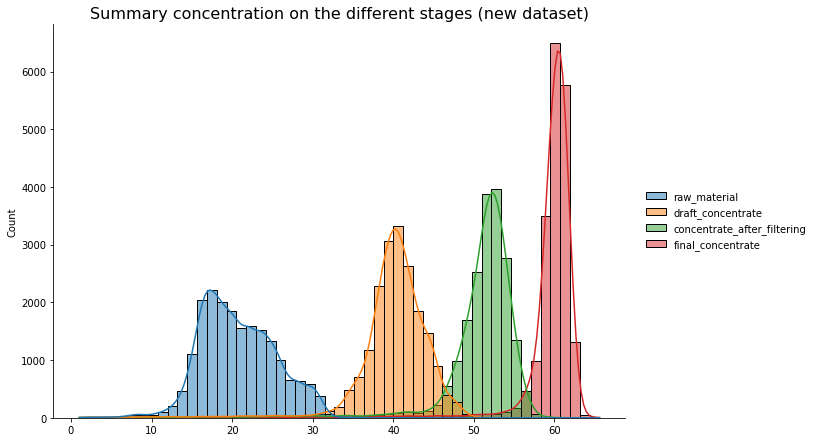

In [37]:
sns.displot(full_clean[['raw_material', 'draft_concentrate', 
                       'concentrate_after_filtering', 'final_concentrate']], 
            legend=True, 
            kde=True, 
            height=6, 
            aspect=1.5)
plt.title('Summary concentration on the different stages (new dataset)', fontsize=16)
plt.show()

In [38]:
full_clean[['raw_material', 'draft_concentrate', 'concentrate_after_filtering', 'final_concentrate']].describe()

,raw_material,draft_concentrate,concentrate_after_filtering,final_concentrate
count,19575.000000,19575.000000,19575.000000,19575.000000
mean,20.733002,40.035789,50.757705,59.335867
std,4.637593,4.732761,5.546544,4.992355
min,1.130990,1.137053,1.037408,1.084495
25%,17.250835,38.494072,49.961182,59.235753
50%,20.219502,40.398724,51.853851,60.268208
75%,23.988143,42.493014,53.318204,61.066597
max,35.071987,55.568687,60.106566,65.575259


Train set:

In [39]:
train_clean = df_train[df_train['date'].isin(full_clean['date'])]
train_clean.dropna(inplace=True)
print('Train set', train_clean.shape)

Train set (14335, 55)


Test set:

In [40]:
test_clean = df_test[df_test['date'].isin(full_clean['date'])]
test_clean.dropna(inplace=True)
print('Test set', test_clean.shape)

Test set (5240, 55)


##  Build the model

### Write a function to calculate the final sMAPE value.

sMAPE = 25% sMAPE(rougher) + 75% sMAPE(final)

In [41]:
def total_smape(smape_rougher, smape_final):
    final_result = 0.25 * smape_rougher + 0.75 * smape_final
    return final_result

### Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

Cross validation will be used for models. Target features must be added to the training and test samples. "rougher.output.recovery" and "final.output.recovery" are the columns in question. Let us make our own training and testing samples, as well as targets for each target feature.

In [42]:
# train set:
target_rougher_train = train_clean['rougher.output.recovery']
target_final_train = train_clean['final.output.recovery']
features_train = train_clean.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

#test set:
target_rougher_test = test_clean['rougher.output.recovery']
target_final_test = test_clean['final.output.recovery']
features_test = test_clean.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

In [43]:
print('features_train', features_train.shape)
print('features_test', features_test.shape)

features_train (14335, 52)
features_test (5240, 52)


In [44]:
numeric = features_train.columns
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [45]:
features_train.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,-0.163144,0.358103,-0.110807,0.275085,-0.440904,-0.303456,-0.423807,-0.800065,-0.430060,-0.276206,...,-1.041743,-0.467231,-0.635067,-0.756150,-1.156730,-0.380062,-0.859998,-0.426918,-0.938255,-2.627458
1,-0.199469,0.407362,-0.110807,0.311963,-0.235809,-0.359160,-0.237114,-0.321997,-0.235742,-0.294497,...,-1.046092,-0.526362,-0.663572,-0.698061,-1.137223,-0.428784,-0.876594,-0.429760,-0.964956,-2.467069
2,-0.244403,0.706524,-0.110807,0.281733,-0.038497,-0.333802,-0.051033,-0.343443,-0.042250,-0.338353,...,-1.042065,-0.467876,-0.670775,-0.694660,-1.131786,-0.427714,-0.871502,-0.428109,-0.959666,-2.510516
3,-0.282885,0.708243,-0.110807,0.296250,-0.050833,-0.360469,-0.048957,-0.316539,-0.054892,-0.334346,...,-1.038258,-0.435253,-0.654219,-0.695695,-1.149050,-0.403416,-0.877894,-0.421422,-0.963700,-2.472604
4,-0.389222,0.881714,-0.110807,0.331076,-0.040179,-0.305226,-0.043028,-0.335218,-0.060265,-0.338863,...,-1.039890,-0.415276,-0.663088,-0.693296,-1.156717,-0.468519,-0.892422,-0.423981,-0.965254,-2.512353


In [46]:
random_state = 123
cv = 5

In [47]:
models = [DecisionTreeRegressor(random_state = random_state), 
          RandomForestRegressor(random_state=random_state), 
          LinearRegression()]

In [48]:
#creating a function for sMAPE score:
def smape_scorer(target, predictions):
    smape = ((1 / len(target)) * (abs(target - predictions) / ((abs(target) + abs(predictions)) / 2))).sum() * 100
    return smape

In [49]:
#creating a function for scoring the model:
def fit_and_check(model, params, df_train, df_target):
    my_scorer = make_scorer(smape_scorer, greater_is_better=False)
    clf = GridSearchCV(model, params, scoring=my_scorer, cv=5)
    clf.fit(df_train, df_target)
    
    return clf.best_estimator_, clf.best_score_

Let's check linear regression, decision tree and random forest models. 

In [50]:
results_cross_val = []

for model in models: */
    
    scorer = make_scorer(smape_scorer, greater_is_better=False) 
    
    cross_val_score_rougher = cross_val_score(model, 
                                              features_train, 
                                              target_rougher_train, 
                                              cv=cv, scoring=scorer).mean()
    cross_val_score_final = cross_val_score(model, 
                                            features_train, 
                                            target_final_train, 
                                            cv=cv, scoring=scorer).mean()

    results_cross_val.append({'model name': model.__class__.__name__, 
                              'cross_val_score_rougher': cross_val_score_rougher, 
                              'cross_val_score_final': cross_val_score_final}) 
              
pd.DataFrame(results_cross_val)

,model name,cross_val_score_rougher,cross_val_score_final
0,DecisionTreeRegressor,-40.751981,-14.541129
1,RandomForestRegressor,-27.469484,-9.642616
2,LinearRegression,-20.876236,-11.324803


The best result is shown by the random forest model. We select hyperparameters and try to improve the performance of the model.

In [ ]:
%%time 
results = []

for depth in range(1,5):
    
    for estimator in range(10, 21, 5):
        
        model = RandomForestRegressor(random_state=random_state, 
                                       n_estimators=estimator, 
                                       max_depth=depth)
        
        scorer = make_scorer(smape_scorer, greater_is_better=False) 
    
        cross_val_score_rougher = cross_val_score(model, features_train, target_rougher_train, cv=cv, scoring=scorer).mean()
        cross_val_score_final = cross_val_score(model, features_train, target_final_train, cv=cv, scoring=scorer).mean()

        smape_final_result = total_smape(cross_val_score_rougher, cross_val_score_final)

        results.append({'model name': model.__class__.__name__, 
                        'Hyperparameters': {'random_state': random_state, 
                                            'n_estimators': estimator, 
                                            'max_depth':depth}, 
                        'smape_final_result': smape_final_result})

pd.DataFrame(results).style.highlight_max(color = 'lightgreen', axis = 0)

As we see the best scoring has a Random Forest model. After checking it with hyperarameters I found out that the best result showed model with n_estimators - 15 and max_depth - 4

**The best models training**

In [ ]:
model_final = RandomForestRegressor(random_state=random_state, 
                                       n_estimators=15, 
                                       max_depth=4)

model_final.fit(features_train, target_rougher_train)
predictions_r = model_final.predict(features_test)

model_final.fit(features_train, target_final_train)
predictions_f = model_final.predict(features_test)

In [ ]:
smape_r = smape_scorer(target_rougher_test, predictions_r)
smape_f = smape_scorer(target_final_test, predictions_f)

print('Final sMAPE:', total_smape(smape_r, smape_f))

In [ ]:
len(df_train) + len(df_test)

In [ ]:
dummy_regr = DummyRegressor(strategy='mean')

dummy_regr.fit(features_train, target_rougher_train)
predictions_r_dummy = dummy_regr.predict(features_test)

dummy_regr.fit(features_train, target_final_train)
predictions_f_dummy = dummy_regr.predict(features_test)

In [ ]:
smape_r_dummy = smape_scorer(target_rougher_test, predictions_r_dummy)
smape_f_dummy = smape_scorer(target_final_test, predictions_f_dummy)

print('Final sMAPE', total_smape(smape_r_dummy, smape_f_dummy))

The random forest model showed the best results.Sanity check also was successful.

# Conclusion


The project's goal of creating a prototype of a machine learning model that can predict the recovery rate of gold from gold ore has been met.
The data was processed and analyzed during the project, and a random forest model was built and trained as a result. The final model outperforms the constant model: the trained model's error is 7.7%, while the constant model's error is 7.9%.
During the project, the following steps were taken:

1. read and analyzed the data (prepared an EDA report for each dataset)
2. data that has been pre-processed (processing missing values, replacing data type, checking for duplicates)
3. double-checked the enrichment efficiency calculation.
4. investigated how metal concentrations (Au, Ag, Pb) change during the purification process. We can conclude that the concentration of each metal varies depending on the stage of purification: gold concentration gradually increases with each stage, silver concentration decreases, and lead concentration increases in the first three stages.
5. performed a granule size analysis on the training and test sets to ensure that the granule sizes are roughly evenly distributed in the training and test sets.
6. examined the total concentration of all metals at various stages, identifying and removing anomalies (a large number of zeros) from all datasets.
7. created functions to compute sMAPE and final sMAPE
8. compared the performance of various models (DecisionTreeRegressor (), RandomForestRegressor, LinearRegression) and how the best random forest model was selected using the hyperparameters n estimators = 15 and max depth = 4. The final model's work was tested on a test sample, and it performed well: the trained model's error is 7.7%, while the constant error is 7.9%.